Automatically created module for IPython interactive environment


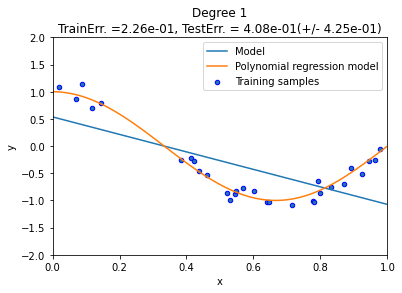

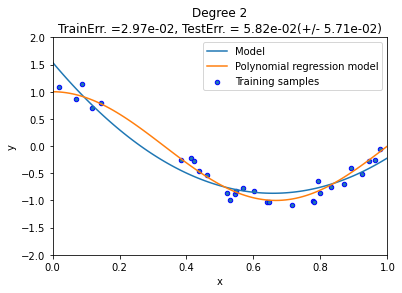

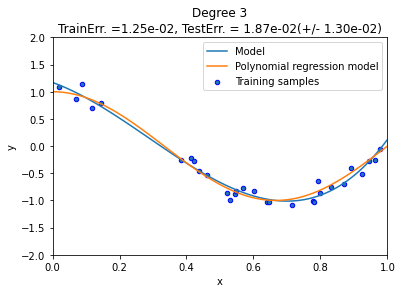

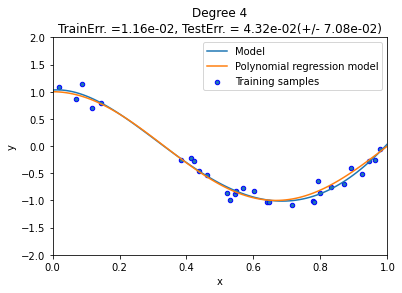

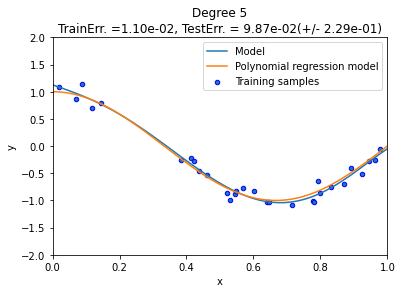

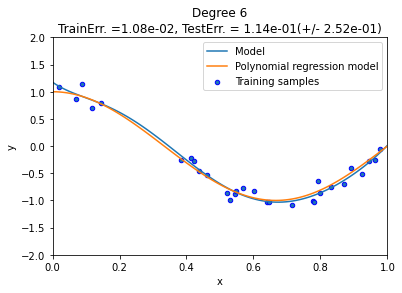

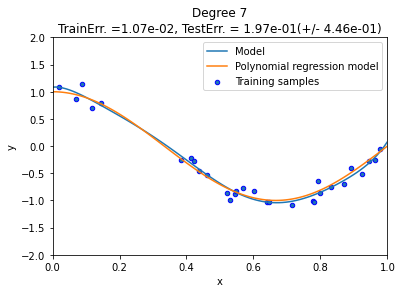

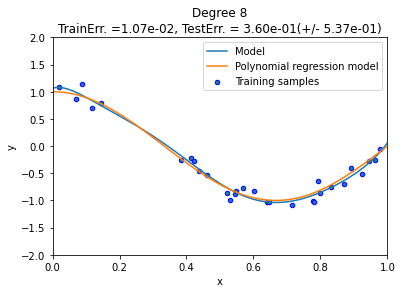

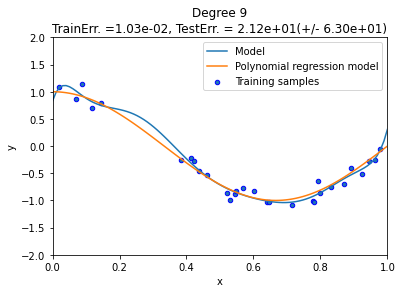

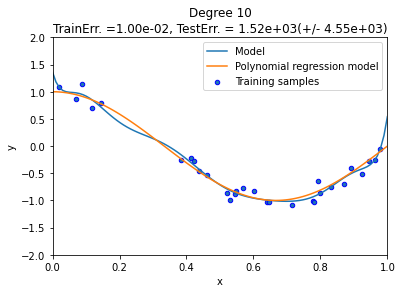

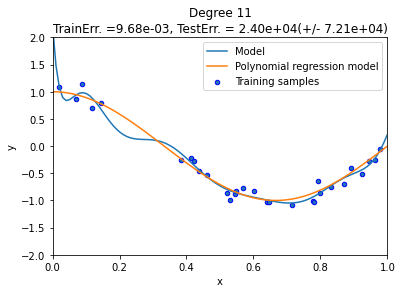

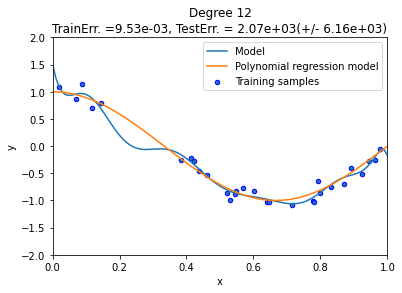

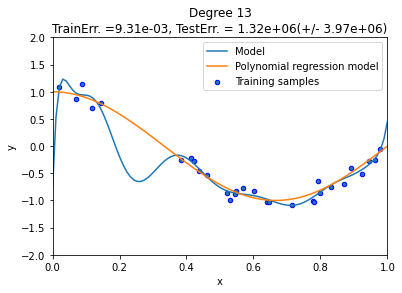

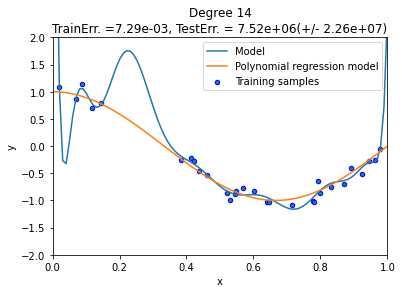

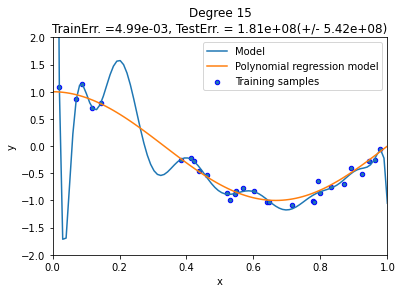

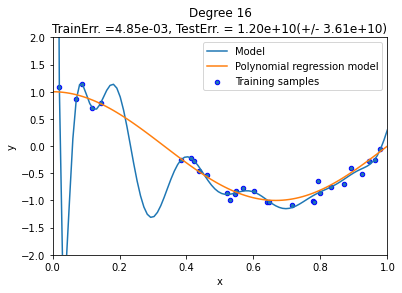

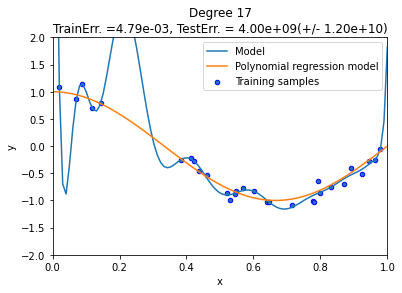

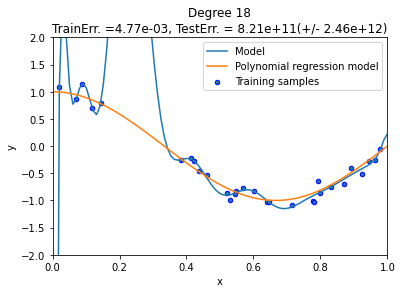

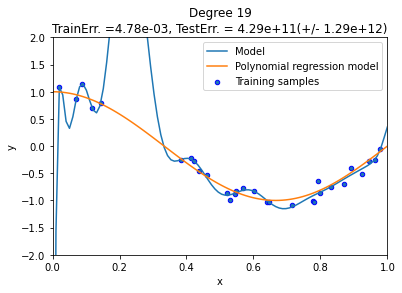

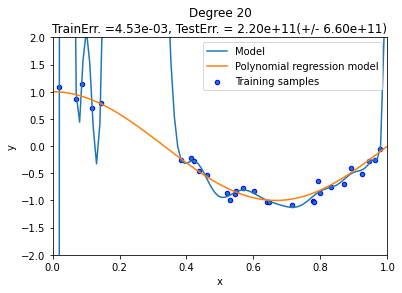

In [0]:
#多項式次元1-20の多項式特徴量を生成します。
#次に、それぞれの次元で多項式回帰を行います
#各多項式次元について、回帰モデルの概形と、訓練誤差とテスト誤差およびその標準偏差が表示されます

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


#model
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

for i in range(len(degrees)):

    #Generation of training samples
    polynomial_features = PolynomialFeatures(degree=degrees[i],  include_bias=False)
    
    #polynomial regression
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the training erros of models
    y_predict =     pipeline.predict(X[:, np.newaxis])
    mse=mean_squared_error(y, y_predict, multioutput='uniform_average')
        
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="Polynomial regression model")
    plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nTrainErr. ={:.2e}, TestErr. = {:.2e}(+/- {:.2e})".format(
        degrees[i], mse, -scores.mean(), scores.std()))
    plt.show()
